<a href="https://colab.research.google.com/github/alishba-cmd/RhombixTechnologies_Tasks/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🔹 Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


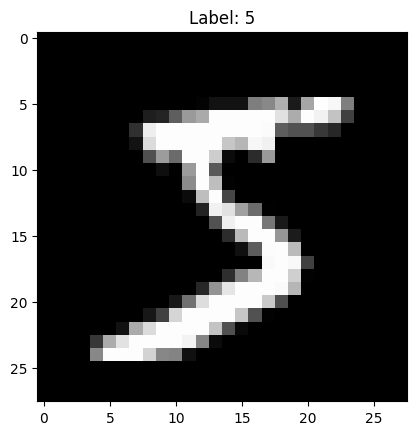

In [2]:
# 🔹 Step 2: Load and Preprocess the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()



In [3]:
# 🔹 Step 3: Build the Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 🔹 Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# 🔹 Step 5: Train the Model
model.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8765 - loss: 0.4384
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9650 - loss: 0.1206
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9824 - loss: 0.0552
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0417


In [6]:
# 🔹 Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")



313/313 - 1s - 2ms/step - accuracy: 0.9771 - loss: 0.0777
Test Accuracy: 0.9771000146865845


In [18]:
# 🔹 Step 7: Upload Your Own Image
from google.colab import files
uploaded = files.upload()



Saving handwritten.PNG to handwritten.PNG


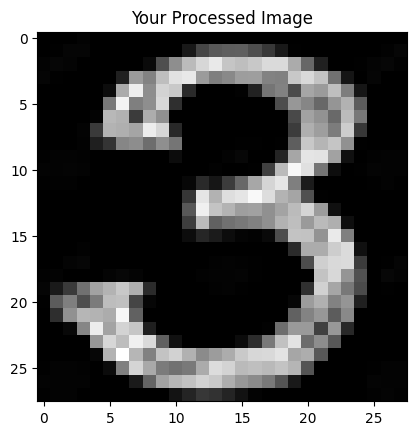

In [19]:
# 🔹 Step 8: Preprocess Uploaded Image
img_path = list(uploaded.keys())[0]  # Get filename

img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize

img_array = np.array(img)
img_array = 255 - img_array              # Invert: dark digit on white background
img_array = img_array / 255.0            # Normalize

img_array = img_array.reshape(1, 28, 28)

plt.imshow(img_array[0], cmap='gray')
plt.title("Your Processed Image")
plt.show()


In [20]:
# 🔹 Step 9: Predict Your Image
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit: 3
